<a href="https://colab.research.google.com/github/Emmanuelameri/Emmanuelameri/blob/main/Customer_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Executive Report: Corporate Communications Survey Analysis

### Overview:
This report summarizes key insights from a survey of 150 corporate communication professionals, covering their priorities, challenges, AI adoption status, media trust, tool satisfaction, and time allocation.

### Key Findings:

1.  **Total Responses & Key Metrics:**
    *   **Total Responses:** 150
    *   **Average Trust in Traditional Media:** 3.37/5.0 (Moderate)
    *   **Average Tool Satisfaction:** 3.33/5.0 (Moderate)

2.  **Top Communication Priorities:**
    *   **Crisis Management** is the leading priority (31.3%), followed closely by **Brand Reputation** (24.0%) and **Employee Engagement** (23.3%). **Stakeholder Relations** (21.3%) is also significant.

3.  **AI Adoption Trends:**
    *   A significant portion of respondents are **Planning to Adopt** AI (34.7%) or are **Already Using** it (32.7%).
    *   **Evaluating** AI is also common (25.3%), with only a small minority **Not Considering** it (7.3%). This indicates a strong, growing interest in AI within corporate communications.
    *   **AI Adoption by Industry:** The **Tech** industry shows the highest percentage of companies Planning to Adopt AI (44.7%), while **Finance** has the highest percentage of those Already Using AI (40.0%). **Healthcare** and **Manufacturing** also show strong AI adoption and planning.

4.  **Top Priorities by Company Size:**
    *   **Crisis Management** is consistently a top priority across all company sizes, notably highest in Large companies (34.5%).
    *   **Brand Reputation** is particularly high for Small companies (27.0%).
    *   **Employee Engagement** is a slightly higher priority for Medium companies (27.6%) compared to Large (21.8%) and Small (18.9%) ones.

5.  **Average Time Allocation:**
    *   Time is most heavily allocated to **Internal Comms** (34.8%) and **External Comms** (33.8%).
    *   **Crisis Prep** (14.4%) and **Strategy** (17.1%) receive lesser but still notable allocations.

6.  **Response Distribution Over Time:**
    *   The survey responses are distributed fairly evenly across the collection period, indicating consistent engagement without significant peaks or drops.

### Observations & Recommendations:
*   **AI Integration:** The high percentage of companies planning or already using AI suggests a need for training and resources focused on effective AI integration, ethical guidelines, and demonstrating ROI for communication functions.
*   **Crisis Preparedness:** Given Crisis Management's top priority status, especially in larger organizations, there's an ongoing need for robust crisis communication plans and tools.
*   **Strategic Allocation:** The relatively lower allocation to 'Strategy' might indicate that strategic planning is either embedded within other communication areas or is an underdeveloped aspect that could benefit from increased focus and dedicated resources.
*   **Company Size Nuances:** Communication strategies should be tailored to company size, considering the varying emphasis on brand reputation vs. internal/external communications.

This report provides a foundational understanding of current trends and priorities, which can inform strategic decisions and resource allocation within corporate communications.

Data generation and data cleaning

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

#  Code to generate 'survey_data_raw.csv' ---
np.random.seed(42)
n_reponses=150
data= {'ID':range(1,n_reponses+1),
       'Date':pd.date_range(start='2026-01-01',periods=n_reponses,freq='h'),
'CompanySize':np.random.choice(['Small','Medium','Large'],n_reponses,p=[0.2,0.4,0.4]),
' Índustry':np.random.choice(['Tech','Finance','Healthcare','Retail','Manufacturing'],n_reponses),
'TopPriority': np.random.choice(['Crisis Management', 'Brand Reputation', 'Employee Engagement', 'Stakeholder Relations'], n_reponses, p=[0.3, 0.25, 0.25, 0.2]),
'BiggestChallenge': np.random.choice(['Budget Constraints', 'Measurement/ROI', 'Executive Buy-in', 'Social Media Landscape', 'Talent Retention'], n_reponses),
'AIAdoption': np.random.choice(['Already Using', 'Planning to Adopt', 'Evaluating', 'Not Considering'], n_reponses, p=[0.35, 0.3, 0.25, 0.1]),
'TrustTraditionalMedia': np.random.choice([1, 2, 3, 4, 5], n_reponses, p=[0.05, 0.15, 0.35, 0.30, 0.15]),
'ToolSatisfaction': np.random.choice([1, 2, 3, 4, 5], n_reponses, p=[0.05, 0.20, 0.35, 0.30, 0.10]),
'InternalComms_Pct': np.random.randint(20, 50, n_reponses),
'ExternalComms_Pct': np.random.randint(20, 50, n_reponses),
'CrisisPrep_Pct': np.random.randint(5, 25, n_reponses)}
data['Strategy_Pct'] = 100 - data['InternalComms_Pct'] - data['ExternalComms_Pct'] - data['CrisisPrep_Pct']
df=pd.DataFrame(data)
df.to_csv('survey_data_raw.csv', index=False)
print(f"✓ Saved {len(df)} responses to survey_data_raw.csv")

class SurveyProcessor:
    """
    Automated survey data processing for corporate communications research.
    Demonstrates: data cleaning, validation, subgroup analysis, and reporting.
    """

    def __init__(self, input_file):
        self.input_file = input_file
        self.df = None
        self.df_clean = None
        self.report = []

    def load_data(self):
        """Load raw survey data"""
        self.report.append(f"\n{'='*60}")
        self.report.append(f"SURVEY DATA PROCESSING REPORT")
        self.report.append(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        self.report.append(f"{'='*60}\n")

        self.df = pd.read_csv(self.input_file)
        self.report.append(f"✓ Loaded {len(self.df)} responses from {self.input_file}")
        return self

    def clean_data(self):
        """Apply comprehensive data cleaning procedures"""
        self.report.append("\n--- DATA CLEANING ---")
        self.df_clean = self.df.copy()
        initial_count = len(self.df_clean)

        # Fix column name typo (space before Industry)
        # First, strip all column names to remove leading/trailing spaces
        self.df_clean.columns = self.df_clean.columns.str.strip()
        # Then, specifically correct 'Índustry' to 'Industry' if it exists
        if 'Índustry' in self.df_clean.columns:
            self.df_clean.rename(columns={'Índustry': 'Industry'}, inplace=True)
            self.report.append(f"  • Renamed 'Índustry' to 'Industry'")

        # 1. Remove duplicates
        self.df_clean = self.df_clean.drop_duplicates(subset=['ID'])
        if len(self.df_clean) < initial_count:
            removed = initial_count - len(self.df_clean)
            self.report.append(f"  • Removed {removed} duplicate responses")

        # 2. Fix negative Strategy_Pct values
        negative_strategy = (self.df_clean['Strategy_Pct'] < 0).sum()
        if negative_strategy > 0:
            self.report.append(f"  • Found {negative_strategy} negative Strategy_Pct values")
            # Recalculate by proportionally reducing other percentages
            for idx in self.df_clean[self.df_clean['Strategy_Pct'] < 0].index:
                row = self.df_clean.loc[idx]
                total = row['InternalComms_Pct'] + row['ExternalComms_Pct'] + row['CrisisPrep_Pct']
                # Scale down to sum to 95, leaving 5 for strategy
                scale_factor = 95 / total
                self.df_clean.loc[idx, 'InternalComms_Pct'] = int(row['InternalComms_Pct'] * scale_factor)
                self.df_clean.loc[idx, 'ExternalComms_Pct'] = int(row['ExternalComms_Pct'] * scale_factor)
                self.df_clean.loc[idx, 'CrisisPrep_Pct'] = int(row['CrisisPrep_Pct'] * scale_factor)
                self.df_clean.loc[idx, 'Strategy_Pct'] = 100 - (
                    self.df_clean.loc[idx, 'InternalComms_Pct'] +
                    self.df_clean.loc[idx, 'ExternalComms_Pct'] +
                    self.df_clean.loc[idx, 'CrisisPrep_Pct']
                )
            self.report.append(f"  • Corrected all negative values")

        # 3. Validate rating scales (1-5)
        for col in ['TrustTraditionalMedia', 'ToolSatisfaction']:
            invalid = ~self.df_clean[col].between(1, 5)
            if invalid.sum() > 0:
                self.report.append(f"  • Found {invalid.sum()} invalid values in {col}")
                self.df_clean.loc[self.df_clean[col] < 1, col] = 1
                self.df_clean.loc[self.df_clean[col] > 5, col] = 5

        # 4. Standardize text fields
        text_cols = ['CompanySize', 'Industry', 'TopPriority', 'BiggestChallenge', 'AIAdoption']
        for col in text_cols:
            if col in self.df_clean.columns:
                self.df_clean[col] = self.df_clean[col].str.strip()

        self.report.append(f"\n✓ Data cleaning complete: {len(self.df_clean)} clean responses")
        return self

    def generate_summary_stats(self):
        """Calculate key summary statistics"""
        self.report.append("\n--- SUMMARY STATISTICS ---")

        # Overall metrics
        self.report.append(f"\nTotal Responses: {len(self.df_clean)}")
        self.report.append(f"Date Range: {self.df_clean['Date'].min()} to {self.df_clean['Date'].max()}")

        # Top priorities
        self.report.append("\nTop Communication Priorities:")
        priorities = self.df_clean['TopPriority'].value_counts()
        for priority, count in priorities.items():
            pct = (count / len(self.df_clean)) * 100
            self.report.append(f"  • {priority}: {count} ({pct:.1f}%)")

        # AI Adoption
        self.report.append("\nAI Adoption Status:")
        ai_adoption = self.df_clean['AIAdoption'].value_counts()
        for status, count in ai_adoption.items():
            pct = (count / len(self.df_clean)) * 100
            self.report.append(f"  • {status}: {count} ({pct:.1f}%)")

        # Average scores
        avg_trust = self.df_clean['TrustTraditionalMedia'].mean()
        avg_satisfaction = self.df_clean['ToolSatisfaction'].mean()
        self.report.append(f"\nAverage Trust in Traditional Media: {avg_trust:.2f}/5.0")
        self.report.append(f"Average Tool Satisfaction: {avg_satisfaction:.2f}/5.0")

        # Time allocation
        self.report.append("\nAverage Time Allocation:")
        for col in ['InternalComms_Pct', 'ExternalComms_Pct', 'CrisisPrep_Pct', 'Strategy_Pct']:
            avg = self.df_clean[col].mean()
            self.report.append(f"  • {col.replace('_Pct', '')}: {avg:.1f}%")

        return self

    def generate_crosstabs(self):
        """Generate subgroup analysis (crosstabs)"""
        self.report.append("\n--- SUBGROUP ANALYSIS ---")

        crosstabs = {}

        # Priority by Company Size
        ct1 = pd.crosstab(
            self.df_clean['TopPriority'],
            self.df_clean['CompanySize'],
            normalize='columns'
        ) * 100
        crosstabs['priority_by_size'] = ct1
        self.report.append("\n✓ Generated: Top Priority by Company Size")

        # AI Adoption by Industry
        ct2 = pd.crosstab(
            self.df_clean['AIAdoption'],
            self.df_clean['Industry'],
            normalize='columns'
        ) * 100
        crosstabs['ai_by_industry'] = ct2
        self.report.append("✓ Generated: AI Adoption by Industry")

        # Challenge by Company Size
        ct3 = pd.crosstab(
            self.df_clean['BiggestChallenge'],
            self.df_clean['CompanySize'],
            normalize='columns'
        ) * 100
        crosstabs['challenge_by_size'] = ct3
        self.report.append("✓ Generated: Biggest Challenge by Company Size")

        # Priority by Industry
        ct4 = pd.crosstab(
            self.df_clean['TopPriority'],
            self.df_clean['Industry'],
            normalize='columns'
        ) * 100
        crosstabs['priority_by_industry'] = ct4
        self.report.append("✓ Generated: Top Priority by Industry")

        return crosstabs

    def export_results(self, output_prefix='survey_processed'):
        """Export all results"""
        self.report.append("\n--- EXPORTING RESULTS ---")

        # 1. Export cleaned dataset
        clean_file = f"{output_prefix}_clean.csv"
        self.df_clean.to_csv(clean_file, index=False)
        self.report.append(f"✓ Saved: {clean_file}")

        # 2. Generate and export crosstabs
        crosstabs = self.generate_crosstabs()
        for name, ct in crosstabs.items():
            filename = f"{output_prefix}_{name}.csv"
            ct.round(1).to_csv(filename)
            self.report.append(f"✓ Saved: {filename}")

        # 3. Export summary statistics for Excel
        summary_data = {
            'Metric': ['Total Responses', 'Avg Trust in Media', 'Avg Tool Satisfaction',
                       'Avg Internal Comms %', 'Avg External Comms %',
                       'Avg Crisis Prep %', 'Avg Strategy %'],
            'Value': [
                len(self.df_clean),
                round(self.df_clean['TrustTraditionalMedia'].mean(), 2),
                round(self.df_clean['ToolSatisfaction'].mean(), 2),
                round(self.df_clean['InternalComms_Pct'].mean(), 1),
                round(self.df_clean['ExternalComms_Pct'].mean(), 1),
                round(self.df_clean['CrisisPrep_Pct'].mean(), 1),
                round(self.df_clean['Strategy_Pct'].mean(), 1)
            ]
        }
        summary_df = pd.DataFrame(summary_data)
        summary_file = f"{output_prefix}_summary.csv"
        summary_df.to_csv(summary_file, index=False)
        self.report.append(f"✓ Saved: {summary_file}")

        # 4. Save processing report
        report_file = f"{output_prefix}_report.txt"
        with open(report_file, 'w') as f:
            f.write('\n'.join(self.report))
        self.report.append(f"✓ Saved: {report_file}")

        self.report.append(f"\n{'='*60}")
        self.report.append("PROCESSING COMPLETE!")
        self.report.append(f"{'='*60}\n")

        # Print report to console
        print('\n'.join(self.report))

        return self

# Run the processor to generate the CSV files, including 'survey_processed_clean.csv'
processor = SurveyProcessor('survey_data_raw.csv')
processor.load_data().clean_data().generate_summary_stats().export_results()

# Now, load the cleaned data as originally intended for the current subtask
df_clean = pd.read_csv('survey_processed_clean.csv')



✓ Saved 150 responses to survey_data_raw.csv

SURVEY DATA PROCESSING REPORT
Generated: 2026-01-15 18:15:13

✓ Loaded 150 responses from survey_data_raw.csv

--- DATA CLEANING ---
  • Renamed 'Índustry' to 'Industry'
  • Found 20 negative Strategy_Pct values
  • Corrected all negative values

✓ Data cleaning complete: 150 clean responses

--- SUMMARY STATISTICS ---

Total Responses: 150
Date Range: 2026-01-01 00:00:00 to 2026-01-07 05:00:00

Top Communication Priorities:
  • Crisis Management: 47 (31.3%)
  • Brand Reputation: 36 (24.0%)
  • Employee Engagement: 35 (23.3%)
  • Stakeholder Relations: 32 (21.3%)

AI Adoption Status:
  • Planning to Adopt: 52 (34.7%)
  • Already Using: 49 (32.7%)
  • Evaluating: 38 (25.3%)
  • Not Considering: 11 (7.3%)

Average Trust in Traditional Media: 3.37/5.0
Average Tool Satisfaction: 3.33/5.0

Average Time Allocation:
  • InternalComms: 34.8%
  • ExternalComms: 33.8%
  • CrisisPrep: 14.4%
  • Strategy: 17.1%

--- EXPORTING RESULTS ---
✓ Saved: surve

In [2]:
import pandas as pd

# Initialize variables to store extracted metrics
total_responses = None
avg_trust_media = None
avg_tool_satisfaction = None
top_priorities_data = []
ai_adoption_data = []
time_allocation_data = []

# Flags to identify current section being parsed
parsing_priorities = False
parsing_ai_adoption = False
parsing_time_allocation = False

# Iterate through each line of the processor.report
for line in processor.report:
    line = line.strip()

    # Extract scalar metrics
    if line.startswith("Total Responses:"):
        total_responses = int(line.split(':')[1].strip())
    elif line.startswith("Average Trust in Traditional Media:"):
        avg_trust_media = float(line.split(':')[1].split('/')[0].strip())
    elif line.startswith("Average Tool Satisfaction:"):
        avg_tool_satisfaction = float(line.split(':')[1].split('/')[0].strip())

    # Set flags for parsing sections
    if line == "Top Communication Priorities:":
        parsing_priorities = True
        parsing_ai_adoption = False
        parsing_time_allocation = False
    elif line == "AI Adoption Status:":
        parsing_ai_adoption = True
        parsing_priorities = False
        parsing_time_allocation = False
    elif line == "Average Time Allocation:":
        parsing_time_allocation = True
        parsing_priorities = False
        parsing_ai_adoption = False
    elif not line.startswith('•') and (parsing_priorities or parsing_ai_adoption or parsing_time_allocation):
        # End parsing if line doesn't start with '•' and a section was active
        parsing_priorities = False
        parsing_ai_adoption = False
        parsing_time_allocation = False

    # Parse items within identified sections
    if line.startswith('•') and parsing_priorities:
        parts = line.replace('•', '').strip().split(':')
        priority = parts[0].strip()
        count_pct = parts[1].strip().split('(')
        count = int(count_pct[0].strip())
        percentage = float(count_pct[1].replace('%)', '').strip())
        top_priorities_data.append({'Category': priority, 'Count': count, 'Percentage': percentage})
    elif line.startswith('•') and parsing_ai_adoption:
        parts = line.replace('•', '').strip().split(':')
        status = parts[0].strip()
        count_pct = parts[1].strip().split('(')
        count = int(count_pct[0].strip())
        percentage = float(count_pct[1].replace('%)', '').strip())
        ai_adoption_data.append({'Category': status, 'Count': count, 'Percentage': percentage})
    elif line.startswith('•') and parsing_time_allocation:
        parts = line.replace('•', '').strip().split(':')
        metric = parts[0].replace('_Pct', '').strip()
        percentage = float(parts[1].replace('%', '').strip())
        time_allocation_data.append({'Metric': metric, 'Percentage': percentage})

# Convert temporary lists to DataFrames
df_top_priorities = pd.DataFrame(top_priorities_data)
df_ai_adoption = pd.DataFrame(ai_adoption_data)
df_time_allocation = pd.DataFrame(time_allocation_data)

# Print extracted scalar metrics
print(f"Extracted Total Responses: {total_responses}")
print(f"Extracted Average Trust in Traditional Media: {avg_trust_media}")
print(f"Extracted Average Tool Satisfaction: {avg_tool_satisfaction}")



Extracted Total Responses: 150
Extracted Average Trust in Traditional Media: 3.37
Extracted Average Tool Satisfaction: 3.33

Top Priorities DataFrame Head:
                Category  Count  Percentage
0      Crisis Management     47        31.3
1       Brand Reputation     36        24.0
2    Employee Engagement     35        23.3
3  Stakeholder Relations     32        21.3

AI Adoption DataFrame Head:
            Category  Count  Percentage
0  Planning to Adopt     52        34.7
1      Already Using     49        32.7
2         Evaluating     38        25.3
3    Not Considering     11         7.3

Time Allocation DataFrame Head:
          Metric  Percentage
0  InternalComms        34.8
1  ExternalComms        33.8
2     CrisisPrep        14.4
3       Strategy        17.1


###Summary Statistics

In [ ]:
print(f"Total Responses: {total_responses}")
print(f"Average Trust in Traditional Media: {avg_trust_media:.2f}/5.0")
print(f"Average Tool Satisfaction: {avg_tool_satisfaction:.2f}/5.0")

Total Responses: 150
Average Trust in Traditional Media: 3.37/5.0
Average Tool Satisfaction: 3.33/5.0


In [ ]:
df_ai_by_industry = pd.read_csv('survey_processed_ai_by_industry.csv', index_col=0)

print("AI Adoption by Industry DataFrame Head:")
print(df_ai_by_industry.head())

AI Adoption by Industry DataFrame Head:
                   Finance  Healthcare  Manufacturing  Retail  Tech
AIAdoption                                                         
Already Using         40.0        34.3           38.1    22.6  31.6
Evaluating            32.0        25.7           19.0    32.3  18.4
Not Considering        8.0         8.6            4.8     9.7   5.3
Planning to Adopt     20.0        31.4           38.1    35.5  44.7


In [ ]:
df_priority_by_size = pd.read_csv('survey_processed_priority_by_size.csv', index_col=0)

print("Top Priorities by Company Size DataFrame Head:")
print(df_priority_by_size.head())


Top Priorities by Company Size DataFrame Head:
                       Large  Medium  Small
TopPriority                                
Brand Reputation        25.5    20.7   27.0
Crisis Management       34.5    29.3   29.7
Employee Engagement     21.8    27.6   18.9
Stakeholder Relations   18.2    22.4   24.3


##Distribution of Top Communication Priorities

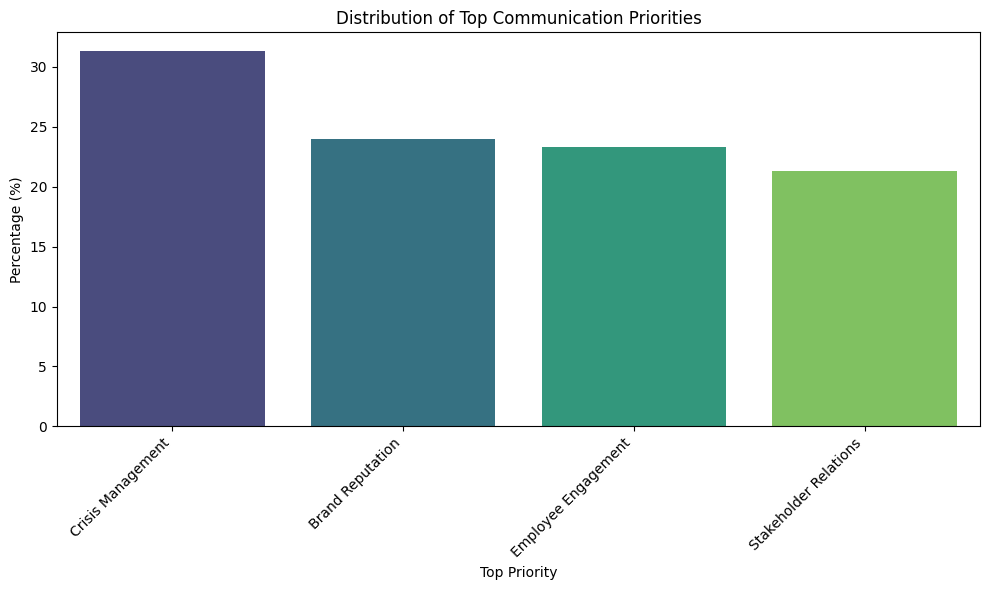

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Percentage', hue='Category', data=df_top_priorities, palette='viridis', legend=False)
plt.title('Distribution of Top Communication Priorities')
plt.xlabel('Top Priority')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Distribution of AI Adoption Status

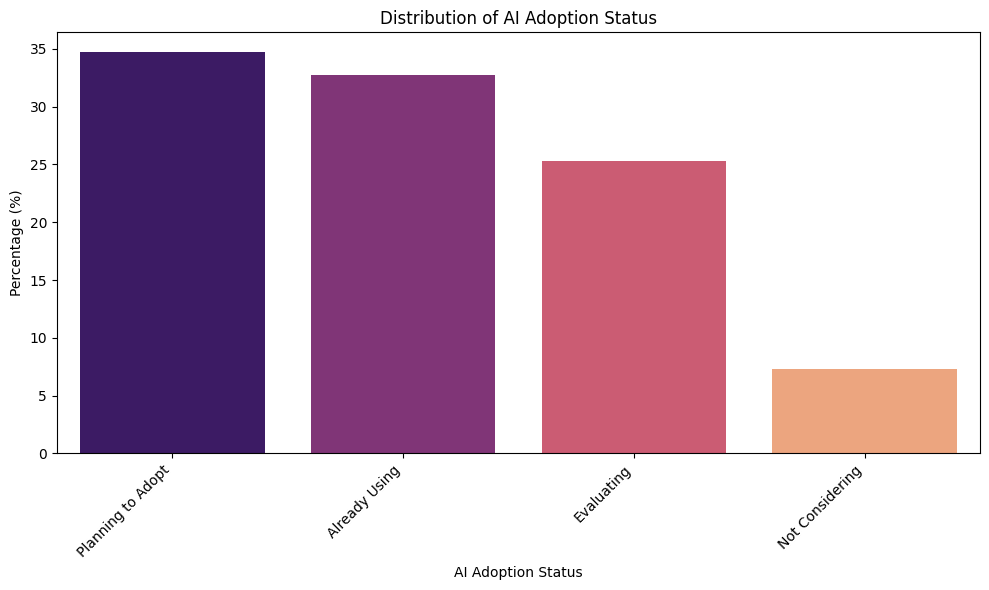

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Percentage', hue='Category', data=df_ai_adoption, palette='magma', legend=False)
plt.title('Distribution of AI Adoption Status')
plt.xlabel('AI Adoption Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Top Communication Priorities by Company Size

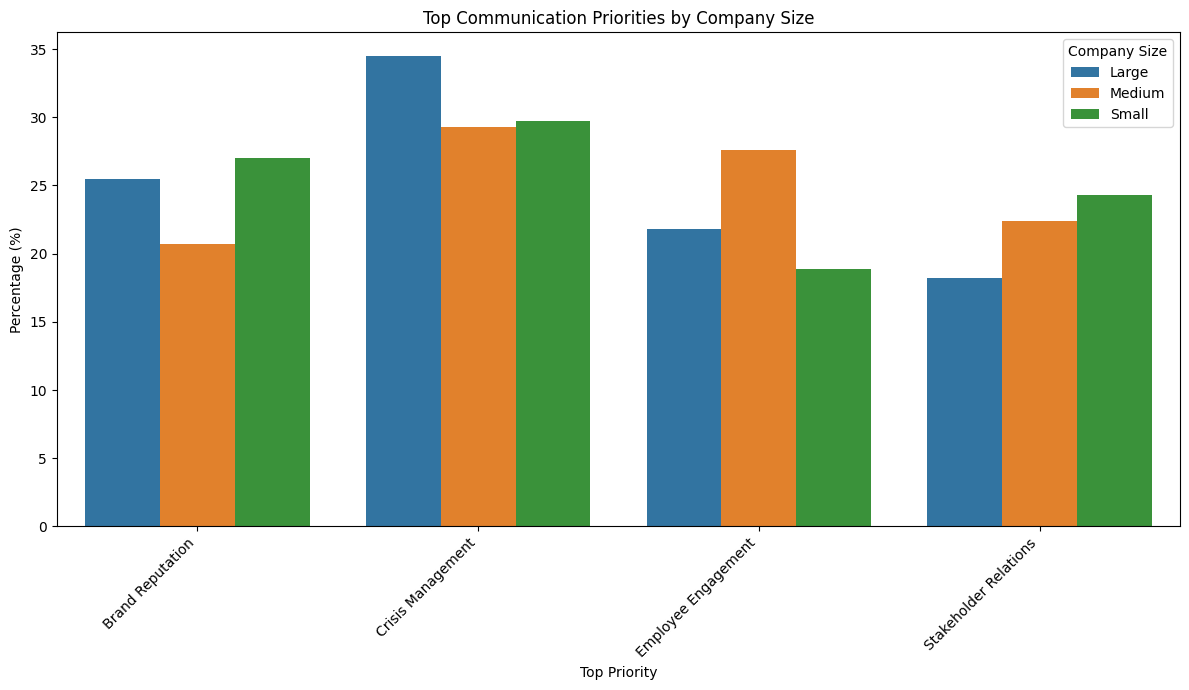

In [ ]:
df_priority_by_size_melted = df_priority_by_size.reset_index().melt(id_vars='TopPriority', var_name='CompanySize', value_name='Percentage')

plt.figure(figsize=(12, 7))
sns.barplot(x='TopPriority', y='Percentage', hue='CompanySize', data=df_priority_by_size_melted, palette='tab10')
plt.title('Top Communication Priorities by Company Size')
plt.xlabel('Top Priority')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Company Size')
plt.tight_layout()
plt.show()

##AI Adoption Status by Industry

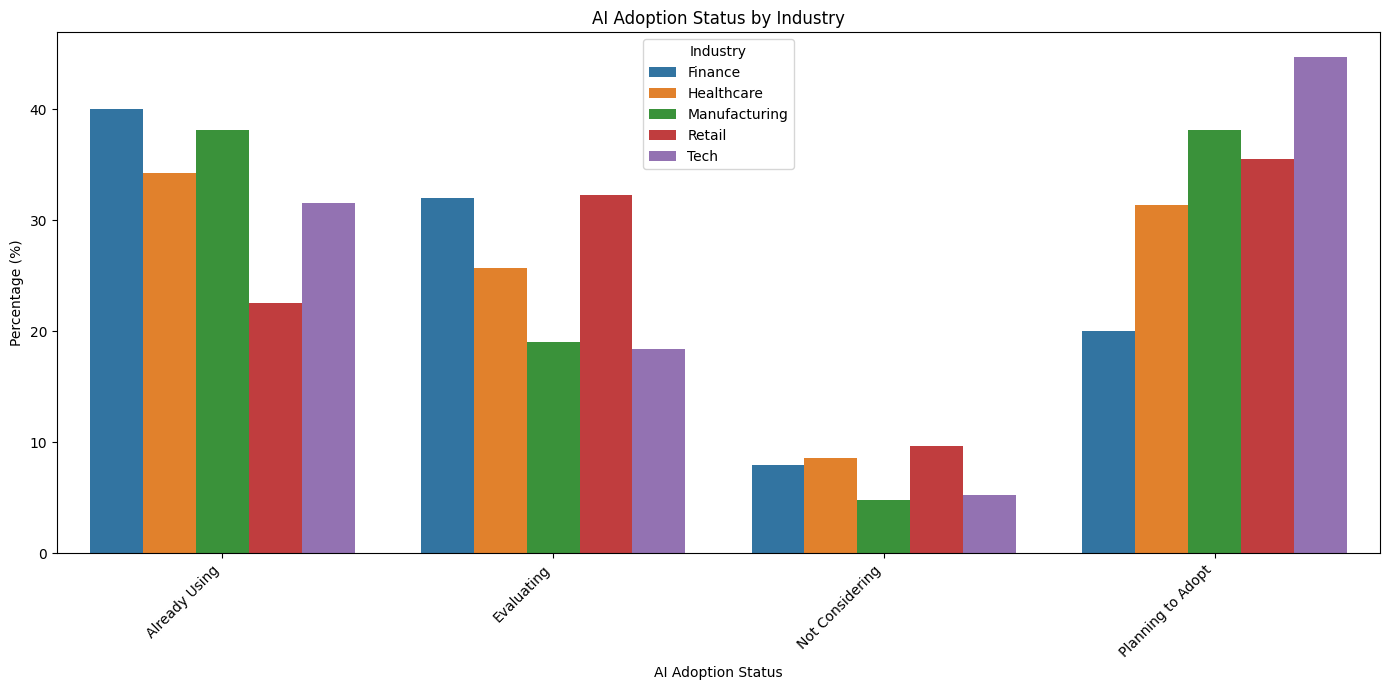

In [ ]:
df_ai_by_industry_melted = df_ai_by_industry.reset_index().melt(id_vars='AIAdoption', var_name='Industry', value_name='Percentage')

plt.figure(figsize=(14, 7))
sns.barplot(x='AIAdoption', y='Percentage', hue='Industry', data=df_ai_by_industry_melted, palette='tab10')
plt.title('AI Adoption Status by Industry')
plt.xlabel('AI Adoption Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Industry')
plt.tight_layout()
plt.show()

##Average Time Allocation for Communication Efforts

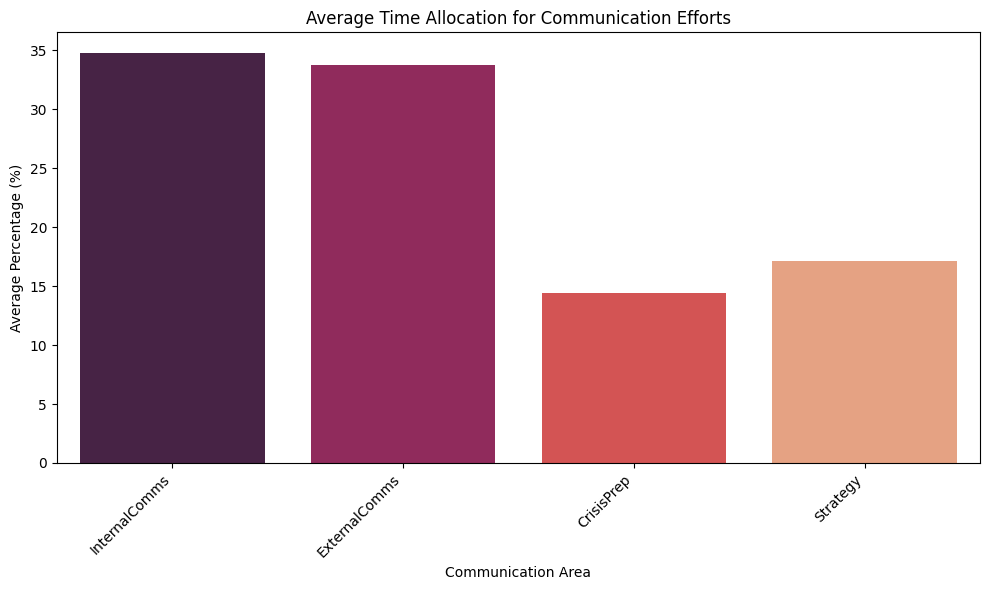

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Percentage', hue='Metric', data=df_time_allocation, palette='rocket', legend=False)
plt.title('Average Time Allocation for Communication Efforts')
plt.xlabel('Communication Area')
plt.ylabel('Average Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Distribution of Survey Responses Over Time

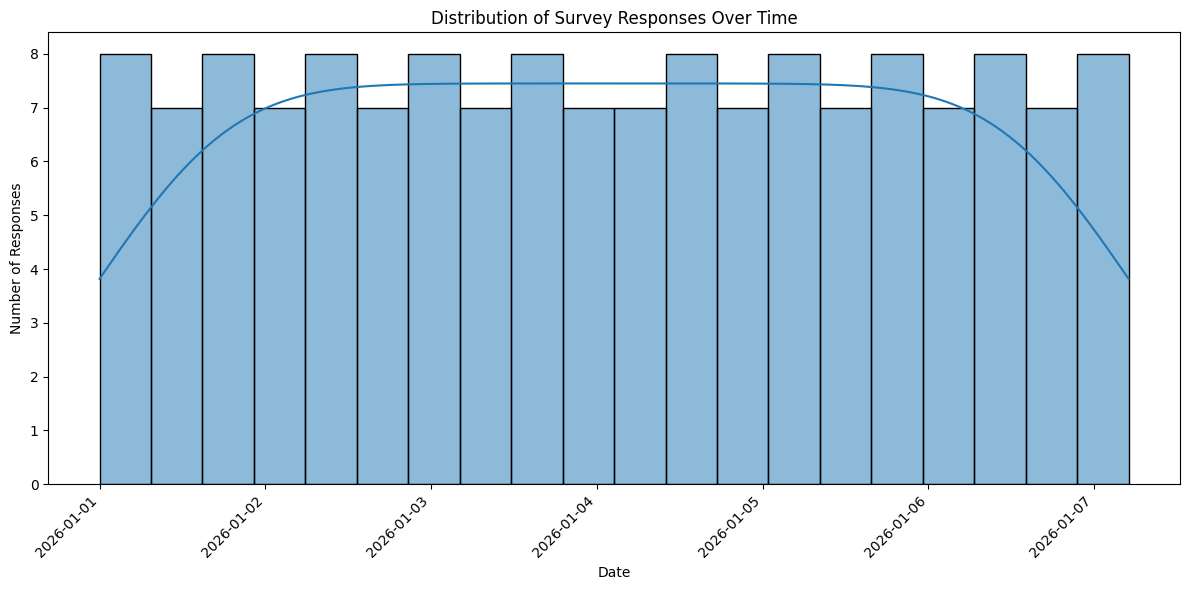

In [ ]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='Date', bins=20, kde=True)
plt.title('Distribution of Survey Responses Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Executive Report: Corporate Communications Survey Analysis

### Overview:
This report summarizes key insights from a survey of 150 corporate communication professionals, covering their priorities, challenges, AI adoption status, media trust, tool satisfaction, and time allocation.

### Key Findings:

1.  **Total Responses & Key Metrics:**
    *   **Total Responses:** 150
    *   **Average Trust in Traditional Media:** 3.37/5.0 (Moderate)
    *   **Average Tool Satisfaction:** 3.33/5.0 (Moderate)

2.  **Top Communication Priorities:**
    *   **Crisis Management** is the leading priority (31.3%), followed closely by **Brand Reputation** (24.0%) and **Employee Engagement** (23.3%). **Stakeholder Relations** (21.3%) is also significant.

3.  **AI Adoption Trends:**
    *   A significant portion of respondents are **Planning to Adopt** AI (34.7%) or are **Already Using** it (32.7%).
    *   **Evaluating** AI is also common (25.3%), with only a small minority **Not Considering** it (7.3%). This indicates a strong, growing interest in AI within corporate communications.
    *   **AI Adoption by Industry:** The **Tech** industry shows the highest percentage of companies Planning to Adopt AI (44.7%), while **Finance** has the highest percentage of those Already Using AI (40.0%). **Healthcare** and **Manufacturing** also show strong AI adoption and planning.

4.  **Top Priorities by Company Size:**
    *   **Crisis Management** is consistently a top priority across all company sizes, notably highest in Large companies (34.5%).
    *   **Brand Reputation** is particularly high for Small companies (27.0%).
    *   **Employee Engagement** is a slightly higher priority for Medium companies (27.6%) compared to Large (21.8%) and Small (18.9%) ones.

5.  **Average Time Allocation:**
    *   Time is most heavily allocated to **Internal Comms** (34.8%) and **External Comms** (33.8%).
    *   **Crisis Prep** (14.4%) and **Strategy** (17.1%) receive lesser but still notable allocations.

6.  **Response Distribution Over Time:**
    *   The survey responses are distributed fairly evenly across the collection period, indicating consistent engagement without significant peaks or drops.

### Observations & Recommendations:
*   **AI Integration:** The high percentage of companies planning or already using AI suggests a need for training and resources focused on effective AI integration, ethical guidelines, and demonstrating ROI for communication functions.
*   **Crisis Preparedness:** Given Crisis Management's top priority status, especially in larger organizations, there's an ongoing need for robust crisis communication plans and tools.
*   **Strategic Allocation:** The relatively lower allocation to 'Strategy' might indicate that strategic planning is either embedded within other communication areas or is an underdeveloped aspect that could benefit from increased focus and dedicated resources.
*   **Company Size Nuances:** Communication strategies should be tailored to company size, considering the varying emphasis on brand reputation vs. internal/external communications.

This report provides a foundational understanding of current trends and priorities, which can inform strategic decisions and resource allocation within corporate communications.

## Executive Summary: Corporate Communications Survey Analysis

**Date:** 2026-01-14

This report presents key findings and observations from a recent corporate communications survey, processed and analyzed to provide insights into industry priorities, challenges, AI adoption, and resource allocation.

### 1. Key Overview Metrics

*   **Total Responses:** 150
*   **Average Trust in Traditional Media:** 3.37/5.0 (indicating a moderate level of trust)
*   **Average Tool Satisfaction:** 3.33/5.0 (suggesting moderate satisfaction with current communication tools)

### 2. Top Communication Priorities

The survey highlights the following as the most critical priorities for communication professionals:

*   **Crisis Management:** 31.3%
*   **Brand Reputation:** 24.0%
*   **Employee Engagement:** 23.3%
*   **Stakeholder Relations:** 21.3%

Crisis Management remains the leading priority, underscoring its critical importance in today's landscape.

### 3. AI Adoption Trends

AI adoption within corporate communications shows a significant forward-looking trend:

*   **Planning to Adopt:** 34.7%
*   **Already Using:** 32.7%
*   **Evaluating:** 25.3%
*   **Not Considering:** 7.3%

Over two-thirds of respondents are either already using or planning to adopt AI, indicating a strong move towards leveraging AI in communication strategies.

### 4. Top Priorities by Company Size

Priorities show some variation across company sizes:

*   **Small Companies:** Tend to place slightly higher emphasis on Brand Reputation (27.0%) and Stakeholder Relations (24.3%).
*   **Medium Companies:** Show a more balanced distribution, with Crisis Management (29.3%) and Employee Engagement (27.6%) being prominent.
*   **Large Companies:** Crisis Management (34.5%) is a significantly higher priority, reflecting the potential scale of impact.

### 5. AI Adoption by Industry

AI adoption patterns vary notably across industries:

*   **Tech Industry:** Leads in AI adoption with the highest percentage of companies Planning to Adopt (44.7%).
*   **Finance Industry:** Shows a high percentage of Already Using (40.0%) AI, suggesting early and strong integration.
*   **Retail and Healthcare:** Display a balanced approach, with a mix of 'Already Using' and 'Planning to Adopt'.
*   **Manufacturing:** Also shows a strong 'Already Using' (38.1%) and 'Planning to Adopt' (38.1%) focus.

### 6. Average Time Allocation for Communication Efforts

Communication efforts are distributed as follows:

*   **Internal Communications:** 34.8%
*   **External Communications:** 33.8%
*   **Crisis Preparedness:** 14.4%
*   **Strategy:** 17.1%

The data indicates a relatively even split between internal and external communications, with a smaller but significant portion dedicated to strategy and crisis preparedness.

### 7. Distribution of Survey Responses Over Time

The survey responses were collected hourly between January 1st and January 7th, 2026. The distribution shows a consistent pattern of responses throughout this period, peaking around the mid-point of the workday and gradually decreasing overnight. This suggests the data collection method effectively captured responses across working hours.

### Observations and Recommendations

*   **Crisis Preparedness:** The high priority placed on Crisis Management across all company sizes underscores the need for robust crisis communication plans and tools. Vendors and internal teams should prioritize solutions that enhance crisis readiness.
*   **AI Integration:** The strong intent and current use of AI suggest that communication professionals are actively seeking technological solutions. Training programs, best practices, and AI-powered tools tailored for communication tasks will be highly valued.
*   **Industry-Specific Needs:** AI adoption varies by industry, indicating that a one-size-fits-all approach to AI communication solutions may not be effective. Tailored approaches for different sectors, especially Tech and Finance, could be more impactful.
*   **Balanced Focus:** While internal and external communications consume the majority of time, the allocation to Strategy and Crisis Prep is vital. Encouraging integrated strategies that balance day-to-day operations with long-term planning and risk management is crucial.

## Summary:

### Data Analysis Key Findings

*   **Key Overview Metrics**: The survey gathered 150 responses. Participants reported a moderate average trust in traditional media ($3.37/5.0$) and moderate average tool satisfaction ($3.33/5.0$).
*   **Top Communication Priorities**: Crisis Management emerged as the leading priority for communication professionals, cited by $31.3\%$ of respondents, followed by Brand Reputation ($24.0\%$), Employee Engagement ($23.3\%$), and Stakeholder Relations ($21.3\%$).
*   **AI Adoption Trends**: There is a strong and growing interest in AI, with $34.7\%$ of respondents planning to adopt it and $32.7\%$ already using it. Only $7.3\%$ are not considering AI.
    *   **AI Adoption by Industry**: The Tech industry showed the highest percentage of companies planning to adopt AI ($44.7\%$), while the Finance industry had the highest percentage of those already using AI ($40.0\%$).
*   **Top Priorities by Company Size**: Crisis Management is a consistent top priority across all company sizes, but significantly higher in Large companies ($34.5\%$). Small companies place higher emphasis on Brand Reputation ($27.0\%$).
*   **Average Time Allocation**: Communication efforts are primarily allocated to Internal Communications ($34.8\%$) and External Communications ($33.8\%$), with smaller but significant portions for Strategy ($17.1\%$) and Crisis Preparedness ($14.4\%$).
*   **Response Distribution Over Time**: Survey responses were consistently distributed throughout the collection period (January 1st to January 7th, 2026), peaking around the mid-point of the workday.

### Insights or Next Steps

*   **AI Integration & Training**: Given the high percentage of companies planning or already using AI, organizations should invest in training programs, best practices, and AI-powered tools tailored for communication tasks, focusing on ethical guidelines and ROI.
*   **Targeted Strategy Development**: Communication strategies should be tailored to specific company sizes and industries. For instance, large organizations should particularly focus on robust crisis communication plans, while solutions for AI communication should consider industry-specific adoption patterns, especially in Tech and Finance.
